# A/B Testing and Regression Analysis on Ad Campaigns

## Project Overview
In the current digital era, businesses use multiple advertising platforms to reach potential customers and drive engagement. Choosing the right platform can significantly impact the success of marketing efforts.  

In this project, I conduct an A/B Testing analysis to compare two major advertising platforms, Facebook and Google AdWords.  
The objective is to determine which platform performs better based on the number of clicks, conversions, and cost efficiency.

By analyzing the data, I aim to help businesses make smarter decisions about where to invest their advertising budgets.  
This project applies real-world data analysis techniques to understand user engagement and the effectiveness of online campaigns.

## Research Question

Which advertising platform, Facebook or AdWords, provides better performance in terms of:
- Number of clicks
- Number of conversions
- Overall cost efficiency


# Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

## Overview of the Dataset

The dataset I am using in this project contains information about two advertising campaigns that were run during the year 2019. It includes daily records for a Facebook ad campaign and a Google AdWords campaign.  Each row in the dataset represents one day's results, giving us 365 days of data to work with.

The data includes several important performance metrics that will help me compare how each platform performed over time.

The main columns in the dataset are:

- **Date**: The date on which the campaign data was recorded, from January 1, 2019, to December 31, 2019.
- **Ad Views**: The number of times an ad was shown to users.
- **Ad Clicks**: The number of times users clicked on an ad.
- **Ad Conversions**: The number of times users completed a desired action after clicking on an ad.
- **Cost per Ad**: The amount of money spent to run the ad each day.
- **Click-Through Rate (CTR)**: The percentage of users who clicked on the ad after seeing it.
- **Conversion Rate**: The percentage of users who completed a conversion after clicking the ad.
- **Cost per Click (CPC)**: The average cost paid for each click on the ad.

This information will help me understand which platform performed better and guide my A/B Testing and regression analysis.

In [9]:
# loading the dataset
df = pd.read_csv('marketing_campaign.csv') 

In [12]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [16]:
# no. of rows and columns of the dataset
df.shape

(365, 17)

In [18]:
#datatypes of each columns in the dataset
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [11]:
# converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


## Exploratory Data Analysis (EDA)

### Comparing Facebook and AdWords Ad Clicks


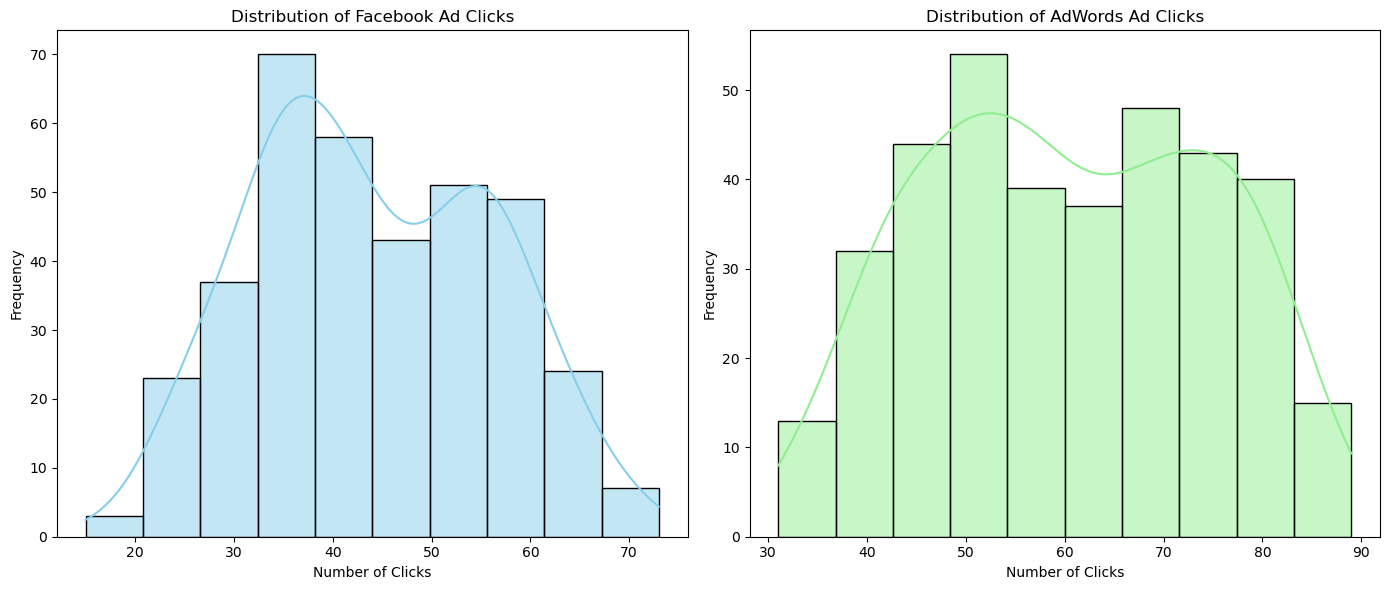

In [13]:
plt.figure(figsize=(14,6))

# Facebook Ad Clicks
plt.subplot(1, 2, 1)
sns.histplot(df['Facebook Ad Clicks'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Facebook Ad Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')

# AdWords Ad Clicks
plt.subplot(1, 2, 2)
sns.histplot(df['AdWords Ad Clicks'], bins=10, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of AdWords Ad Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Comparing Facebook and AdWords Ad Conversions


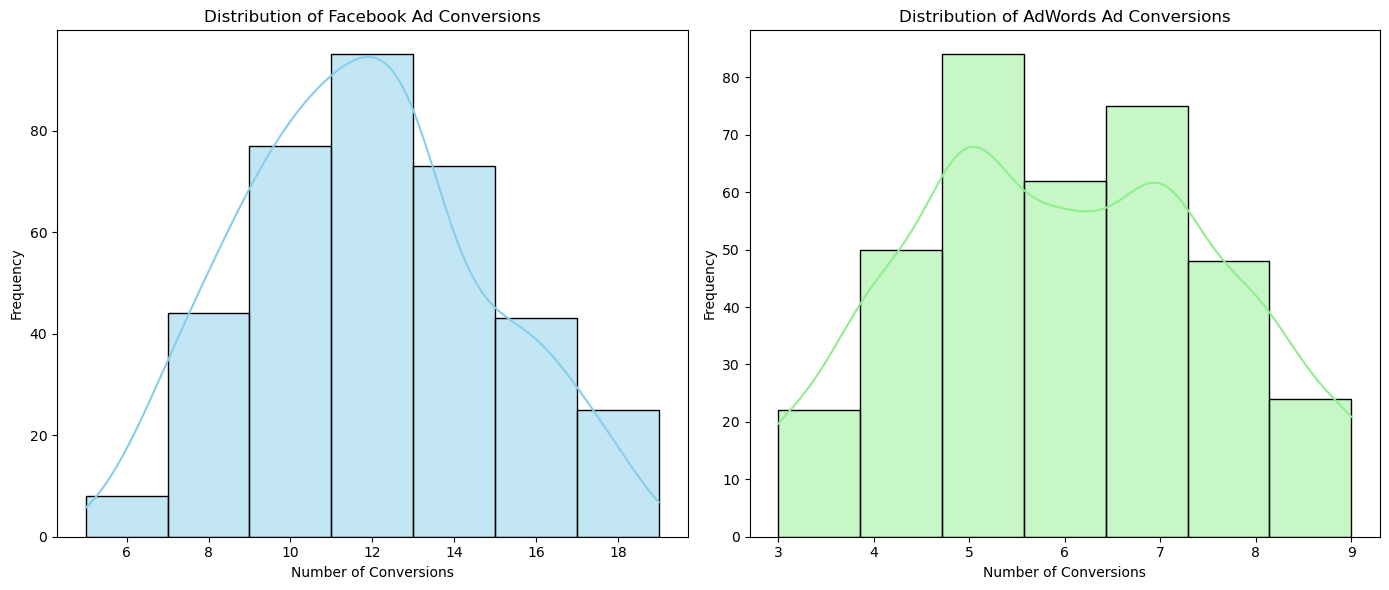

In [15]:
plt.figure(figsize=(14,6))

# Facebook Ad Conversions
plt.subplot(1, 2, 1)
sns.histplot(df['Facebook Ad Conversions'], bins=7, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Facebook Ad Conversions')
plt.xlabel('Number of Conversions')
plt.ylabel('Frequency')

# AdWords Ad Conversions
plt.subplot(1, 2, 2)
sns.histplot(df['AdWords Ad Conversions'], bins=7, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of AdWords Ad Conversions')
plt.xlabel('Number of Conversions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observations from Histograms

The histograms for both Facebook and AdWords show a fairly symmetrical distribution. This suggests that the number of clicks and conversions is spread out evenly without too many extreme high or low values. Overall, there are no major outliers, and the performance data appears to be balanced across most days.


### Creating Conversion Categories for Facebook and AdWords


In [17]:
def create_conversion_category(conversion_column):
    category = []
    for conversion in df[conversion_column]:
        if conversion < 5:
            category.append('Less than 5')
        elif 5 <= conversion < 10:
            category.append('5 - 9')
        elif 10 <= conversion < 15:
            category.append('10 - 14')
        else:
            category.append('15 or more')
    return category

# Applying the function to Facebook and AdWords conversions

df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

# Displaying a few rows to confirm
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']].head()


,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,5 - 9,5,5 - 9
1,12,10 - 14,6,5 - 9
2,8,5 - 9,4,Less than 5
3,9,5 - 9,5,5 - 9
4,7,5 - 9,7,5 - 9


In [19]:
# Counting Facebook Conversion Categories

facebook_counts = df['Facebook Conversion Category'].value_counts().reset_index()
facebook_counts.columns = ['Category', 'Facebook Days']

# Counting AdWords Conversion Categories

adwords_counts = df['AdWords Conversion Category'].value_counts().reset_index()
adwords_counts.columns = ['Category', 'AdWords Days']

# Merging both counts together

category_counts = pd.merge(facebook_counts, adwords_counts, on='Category', how='outer').fillna(0)

# Sorting categories properly

order = ['Less than 5', '5 - 9', '10 - 14', '15 or more']
category_counts['Category'] = pd.Categorical(category_counts['Category'], categories=order, ordered=True)
category_counts = category_counts.sort_values('Category')

category_counts

,Category,Facebook Days,AdWords Days
3,Less than 5,0.0,72.0
2,5 - 9,87.0,293.0
0,10 - 14,210.0,0.0
1,15 or more,68.0,0.0


### Grouped Bar Chart with Labels: Facebook vs AdWords Conversion Categories


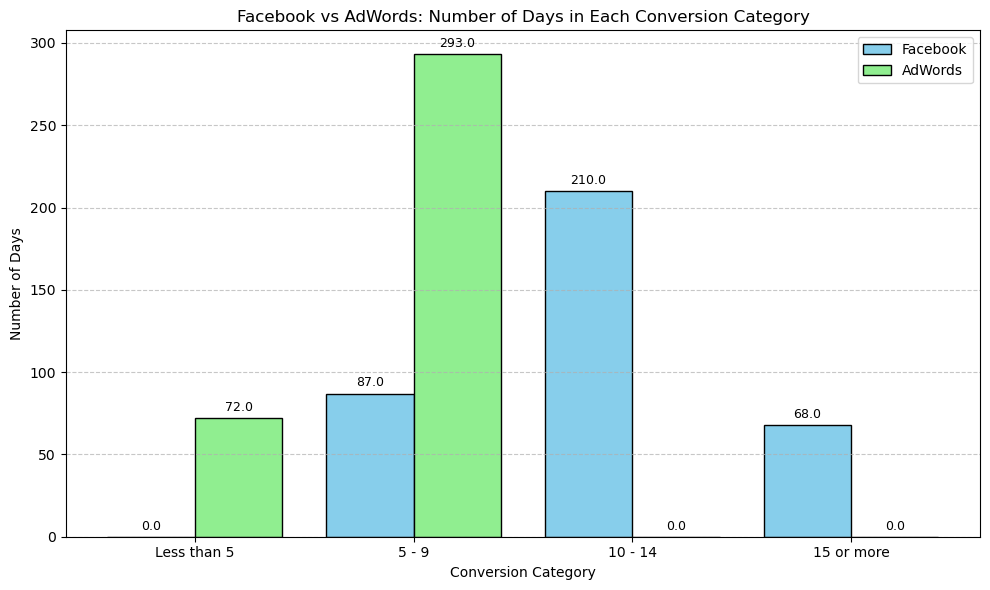

In [21]:
X_axis = np.arange(len(category_counts)) 

plt.figure(figsize=(10,6))
bars1 = plt.bar(X_axis - 0.2, category_counts['Facebook Days'], 0.4, label='Facebook', color='skyblue', edgecolor='black')
bars2 = plt.bar(X_axis + 0.2, category_counts['AdWords Days'], 0.4, label='AdWords', color='lightgreen', edgecolor='black')


for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)


plt.xticks(X_axis, category_counts['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of Days')
plt.title('Facebook vs AdWords: Number of Days in Each Conversion Category')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observations from Conversion Categories

Based on the grouped bar chart, Facebook had significantly more days with higher conversions compared to AdWords. Most Facebook campaign days were in the 10–14 and 15 or more conversion categories, indicating strong user engagement.  In contrast, AdWords had no days with conversions above 10, and the majority of AdWords campaign days were between 5–9 conversions.

This clear gap in performance suggests that Facebook was much more effective at driving conversions, while the AdWords campaign struggled to achieve higher conversion rates.  It may be useful to review the AdWords strategy to identify improvements or adjustments needed.


## Does getting more clicks actually result in more conversions?


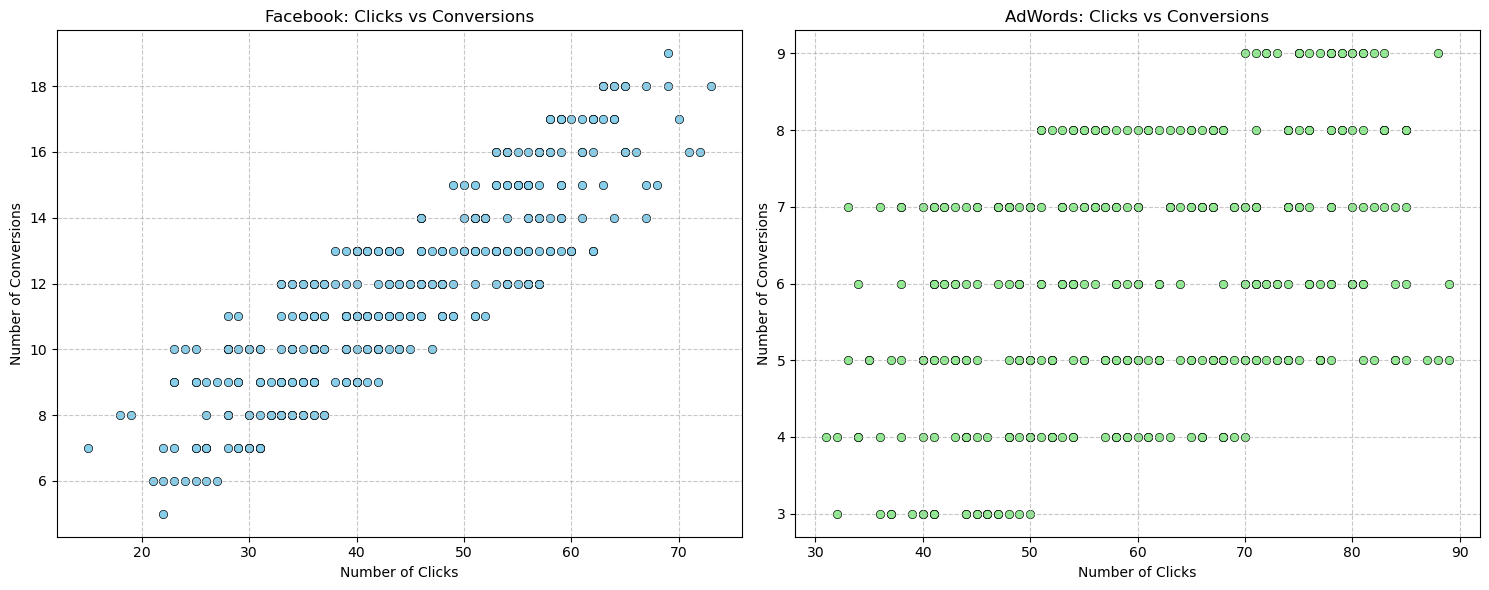

In [23]:
plt.figure(figsize=(15,6))

# Facebook Scatter Plot
plt.subplot(1,2,1)
plt.title('Facebook: Clicks vs Conversions')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='skyblue', edgecolor='black')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Conversions')
plt.grid(True, linestyle='--', alpha=0.7)

# AdWords Scatter Plot
plt.subplot(1,2,2)
plt.title('AdWords: Clicks vs Conversions')
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='lightgreen', edgecolor='black')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Conversions')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
# Calculating correlation between Clicks and Conversions for both platforms

facebook_corr = df[['Facebook Ad Clicks', 'Facebook Ad Conversions']].corr().iloc[0,1]
adwords_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr().iloc[0,1]

print(f"Facebook Correlation (Clicks vs Conversions): {facebook_corr:.2f}")
print(f"AdWords Correlation (Clicks vs Conversions): {adwords_corr:.2f}")

Facebook Correlation (Clicks vs Conversions): 0.87
AdWords Correlation (Clicks vs Conversions): 0.45


### Observations from Correlation Analysis

The correlation coefficient between Facebook ad clicks and conversions is **0.87**, indicating a strong positive linear relationship — as Facebook clicks increase, conversions also tend to increase significantly.

In contrast, the correlation between AdWords clicks and conversions is only **0.45**, suggesting a moderate relationship. This implies that Facebook ads are more consistent in converting clicks into actual user actions compared to AdWords.


## Cost Per Conversion Analysis

To understand which platform is more cost-effective, we calculate the **Cost Per Conversion (CPCV)** — the amount spent to acquire a single conversion.

This metric helps assess the financial efficiency of each campaign. A lower CPCV indicates better performance in terms of return on ad spend.


In [27]:
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].replace('[\$,]', '', regex=True).astype(float)
df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].replace('[\$,]', '', regex=True).astype(float)
df['Facebook Cost Per Conversion'] = df['Cost per Facebook Ad'] / df['Facebook Ad Conversions']
df['AdWords Cost Per Conversion'] = df['Cost per AdWords Ad'] / df['AdWords Ad Conversions']

# Average Cost Per Conversion
facebook_avg_cpcv = df['Facebook Cost Per Conversion'].mean()
adwords_avg_cpcv = df['AdWords Cost Per Conversion'].mean()

print(f"Facebook Avg. Cost Per Conversion: ${facebook_avg_cpcv:.2f}")
print(f"AdWords Avg. Cost Per Conversion: ${adwords_avg_cpcv:.2f}")



Facebook Avg. Cost Per Conversion: $8.07
AdWords Avg. Cost Per Conversion: $24.71


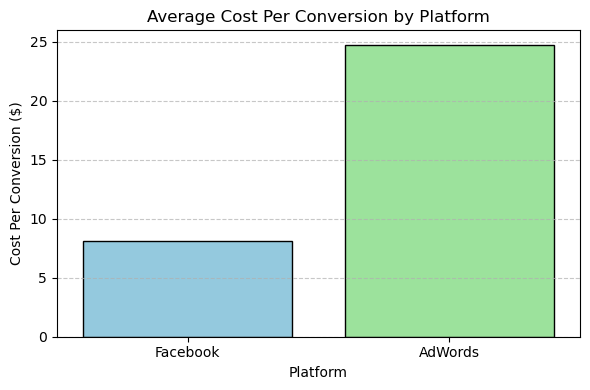

In [29]:
platforms = ['Facebook', 'AdWords']
avg_cpcv = [facebook_avg_cpcv, adwords_avg_cpcv]

plt.figure(figsize=(6,4))
sns.barplot(x=platforms, y=avg_cpcv, palette=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average Cost Per Conversion by Platform')
plt.ylabel('Cost Per Conversion ($)')
plt.xlabel('Platform')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Cost Per Conversion Insight

The average cost to acquire a conversion through Facebook ads was **`$8.07`**, while for AdWords it was **`$24.71`**.  
This indicates that Facebook was not only more effective in generating conversions, but also significantly more **cost-efficient**, making it the better platform in terms of return on ad spend.


## Hypothesis Testing: Are Facebook Ads Statistically More Effective?

To confirm whether the observed difference in conversion performance between Facebook and AdWords is statistically significant,  
we use a two-sample independent **t-test**.

#### Hypotheses:

- **Null Hypothesis (H₀):** There is no significant difference in average conversions between Facebook and AdWords.
- **Alternative Hypothesis (H₁):** Facebook has a significantly higher mean number of conversions.

We use a **significance level of 0.05 (α = 5%)**.


In [37]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    df['Facebook Ad Conversions'],
    df['AdWords Ad Conversions'],
    equal_var=False  # safer option
)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")

if p_value < 0.05:
    print("p-value is less than significance value, Reject the null hypothesis")
else:
    print("The result is not statistically significant — we fail to reject the null hypothesis.")


T-statistic: 32.88
P-value: 9.35e-134
p-value is less than significance value, Reject the null hypothesis


### Interpretation of Hypothesis Testing Results

The T-statistic of 32.88 shows that the difference in average conversions between Facebook and AdWords is very large, especially when compared to the daily variation within each group.
The **p-value** was **9.35 × 10⁻¹³⁴**, which is extremely small and provides overwhelming evidence against the null hypothesis.

These results strongly support the **alternative hypothesis**, confirming that Facebook ads deliver **significantly more conversions** than AdWords.

From a business perspective, this suggests reallocating more of the advertising budget toward Facebook could lead to greater performance. This may include increasing ad spend, testing new creatives, or expanding targeting strategies on Facebook to maximize conversion potential.


## Regression Analysis: Predicting Conversions from Facebook Clicks

To estimate how many conversions we might get from a certain number of Facebook clicks, I built a simple linear regression model. It helps predict expected performance based on past campaign behavior.


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[['Facebook Ad Clicks']]
y = df[['Facebook Ad Conversions']]

reg_model = LinearRegression()
reg_model.fit(X, y)
prediction = reg_model.predict(X)

r2 = r2_score(y, prediction) * 100
mse = mean_squared_error(y, prediction)

print('Accuracy (R2 Score):', round(r2, 2), '%')
print('Mean Squared Error:', round(mse, 2))


Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


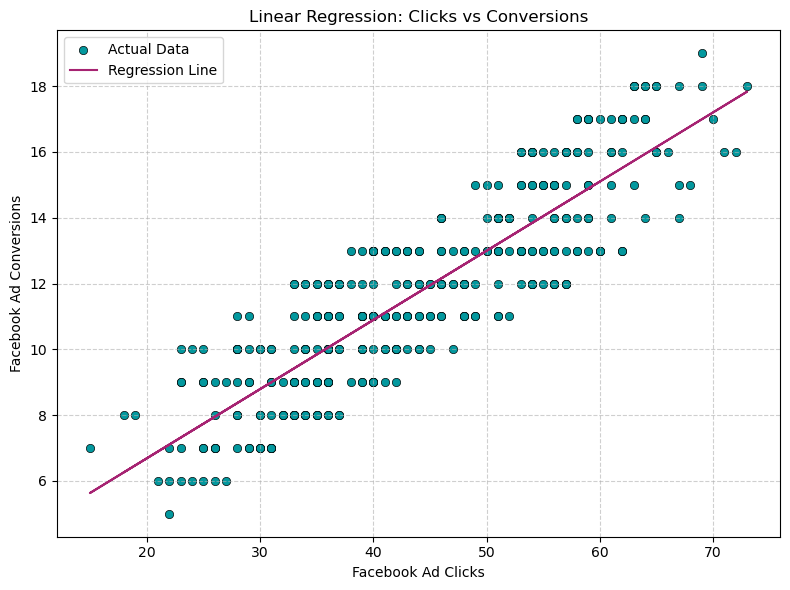

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E', label='Actual Data', edgecolor='black')
plt.plot(df['Facebook Ad Clicks'], prediction, color='#A62372', label='Regression Line')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.title('Linear Regression: Clicks vs Conversions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [46]:
print(f"For 50 Clicks, Predicted Conversions: {reg_model.predict([[50]])[0][0]:.2f}")
print(f"For 80 Clicks, Predicted Conversions: {reg_model.predict([[80]])[0][0]:.2f}")


For 50 Clicks, Predicted Conversions: 13.00
For 80 Clicks, Predicted Conversions: 19.31


### Regression Analysis Insight

The model shows good predictive power, with an R² score of **76.35%**. This means that Facebook ad clicks can explain a large part of the variation in conversions, making it a reliable predictor.

With this regression model, businesses can better plan their ad strategy. It helps estimate how many conversions to expect from a certain number of clicks, which is useful for setting campaign goals, managing budgets, and understanding potential return on investment.


## Analyzing Facebook Campaign metrics over time

To see when conversions happen most often, I looked at both weekly and monthly patterns. This helps understand if certain days or months perform better for Facebook ads.

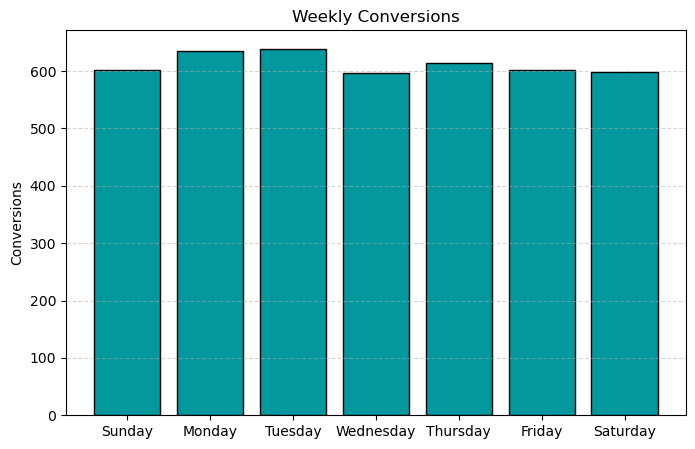

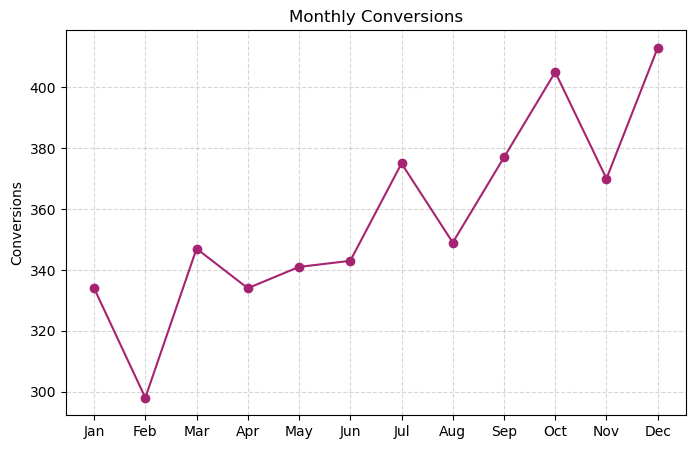

In [55]:
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

# Weekly conversions
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color='#03989E', edgecolor='k')
plt.ylabel('Conversions')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# Monthly conversions
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color='#A62372')
plt.ylabel('Conversions')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Conversion Trend Insight

From the weekly data, conversions remain steady throughout the week, but **Mondays and Tuesdays consistently see higher conversions**.  This suggests that users are more likely to take action earlier in the week, making it a good time to run or boost Facebook campaigns.

Looking at monthly performance, there's a general upward trend in conversions, but **some months like February, April, May, June, August, and November saw noticeable dips**. These fluctuations could be related to seasonal behavior, marketing strategies, or external factors like holidays or academic calendars.


## Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [59]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103226
P-value: 2.1337375979060546e-26

p-value is less than significance value, Reject the null hypothesis


Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.